# Hands on timeseries analysis
### part4 : Time series decomposition

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div> 

<div style="text-align: right"> Initial upload: 2020.08.01 </div> 
<div style="text-align: right"> Last update: 2020.08.01</div> 

시계열 데이터의 속성(Trend, Seasonality, Cyclical)을 알아보고, 데이터를 각 속성별로 분해하는 방법에 대하여 설명한다.  
`statsmodels` 라이브러리를 사용한다.
- 참고자료  
    - [Pandas로 하는 시계열 데이터분석 4강](https://tacademy.skplanet.com/live/player/onlineLectureDetail.action?seq=152#sec2)
    - [How to Decompose Time Series Data into Trend and Seasonality](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)
    - [시계열 분해 (Time series Decomposition)](https://rfriend.tistory.com/510)
    - [Dealing with seasonal data](https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051)

### 1. 시계열 데이터의 구성요소

<img src = 'https://www.datavedas.com/wp-content/uploads/2018/04/3.1.3.1-Introduction-to-Time-Series-Data-R.jpg' width = 500>

- Trend : 데이터의 전반적인 추세나 방향(upward, downward, horizontal/ stationary)  
- Seaonality : 비교적 짧은 주기로 나타나는 패턴(ex: 에어컨 판매량)
- Cyclicity : 장주기 관점에서 발생하는 패턴(ex: 10년 주기로 발생하는 경제지표 급락)
- Irregularity(error, residual, noise) : raw 데이터 에서 Trend, Sesonality, Cyclicity를 제외한 나머지

시계열 데이터가 위 요소로 구성된다고 가정하고 모델링 할수가 있다.  
각 시계열 데이터를 각 요소의 합으로 모델링 하는 것은 `additive` 모델이라고 한다.  
**y(t) = Trend + Sesonality + Noise**  
각 요소의 곱으로 모델링 하는 것을 `multiplicative` 모델이라고 한다.  
**y(t) = Trend * Sesonality * Noise**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_rows', 500)

from statsmodels.tsa.seasonal import seasonal_decompose

### 2. Additive decomposition

임의의 데이터 셋 만들기

In [2]:
series = pd.Series([i + np.random.randint(10) for i in range(1, 100)])

In [3]:
series.head()

0     1
1     7
2    12
3     9
4    12
dtype: int64

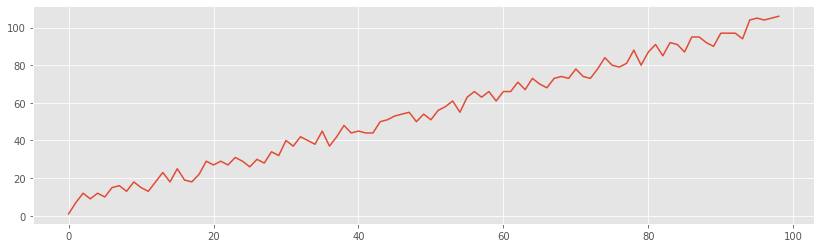

In [4]:
series.plot(figsize = (14, 4))

데이터 분해하기

In [5]:
result = seasonal_decompose(series, model='additive', freq=1)
# freq 샘플링 주기, pd형태가 아닌 데이터에서 반드시 입력해야함
# 여기서는 사실 입력 안해도 됨, index를 참고하여 freq 찾음
# 인덱스가 0 ~ 99 이므로 freq 1임
# seasonality를 알고 있으면 주기를 넣어주면 유용

- raw data는 `result.observed`, Trend 성분은 `result.trend`, Sesonality는 `result.seasonal`, Noise는 `result.resid`에 각각 저장된다.

In [6]:
result.observed.head()

0     1.0
1     7.0
2    12.0
3     9.0
4    12.0
dtype: float64

분해결과 시각화

In [7]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

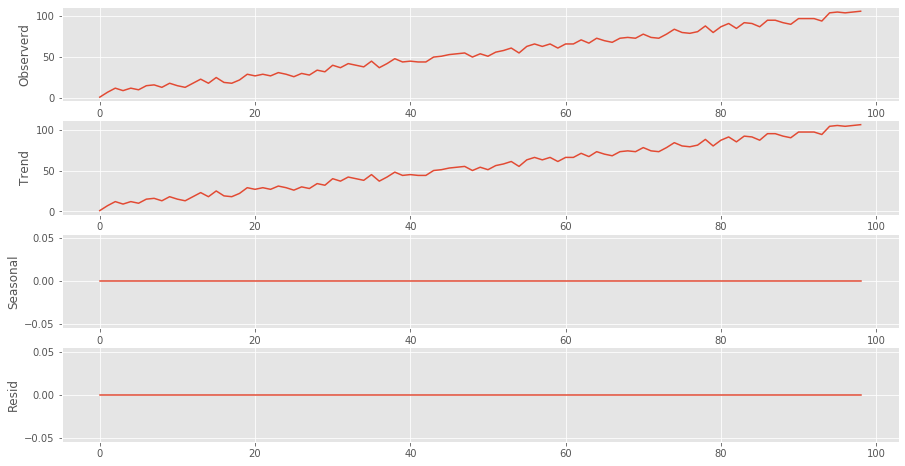

In [8]:
plot_decompose(result)

### 3. Multiplicative decomposition

데이터 만들고 분해해보기

In [9]:
series = pd.Series([i**2 for i in range(1,100)])
result = seasonal_decompose(series, model='multiplicative', freq=1)

분해결과 시각화

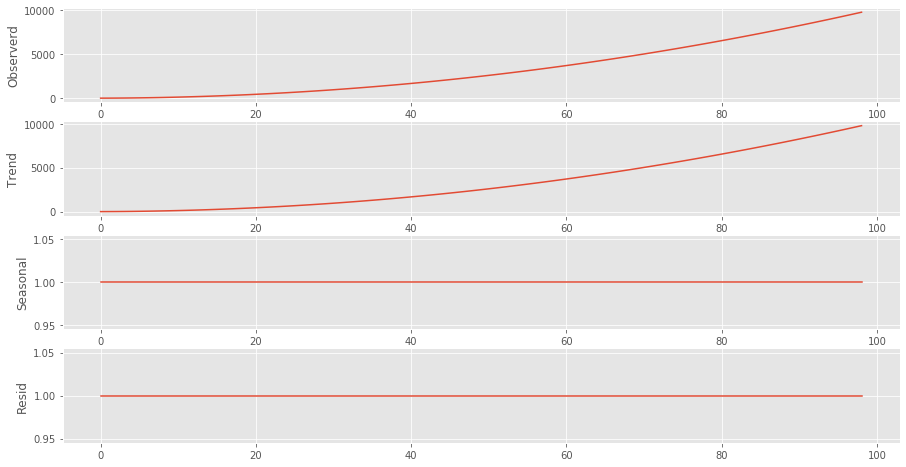

In [10]:
plot_decompose(result)

**정리**  
- additive : Trend가 선형특성을 보이고, Seasonality가 일정한 데이터에 적합  
- multiplicative : Trend가 비산형 특성을 보이고(ex: quadratic, exponential), Seaonality가 증가 또는 감소하는 특성을 보이는 데이터에 적합

### 4. Case study1 : montly milk production

In [11]:
url = 'https://raw.githubusercontent.com/sguys99/datasets/master/monthly-milk-production.csv'
df = pd.read_csv(url, index_col='Month', parse_dates=['Month'])

In [12]:
df.head()

,pounds per cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


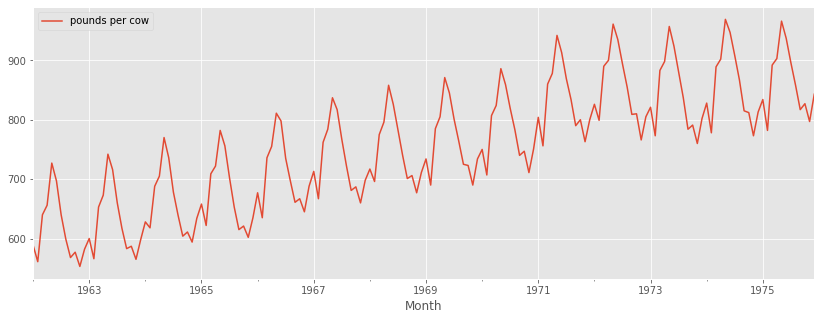

In [13]:
df.plot(figsize = (14, 5))

- Trend가 선형 추세이고 Seasonality 크기가 일정해 보이므로 additive 모델로 가정한다.  

In [14]:
result = seasonal_decompose(df['pounds per cow'], model='additive', freq=1)

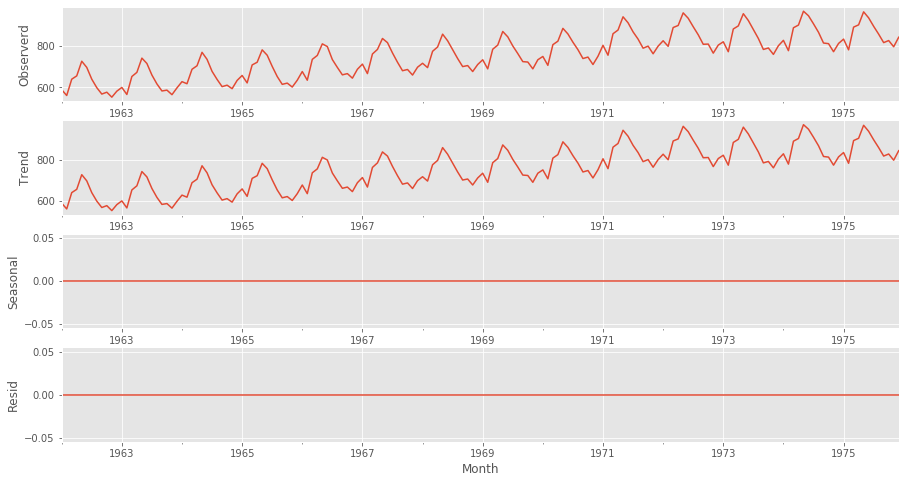

In [15]:
plot_decompose(result)

- 주기를 12로 변경해본다.

In [16]:
result = seasonal_decompose(df['pounds per cow'], model='additive', freq=12)

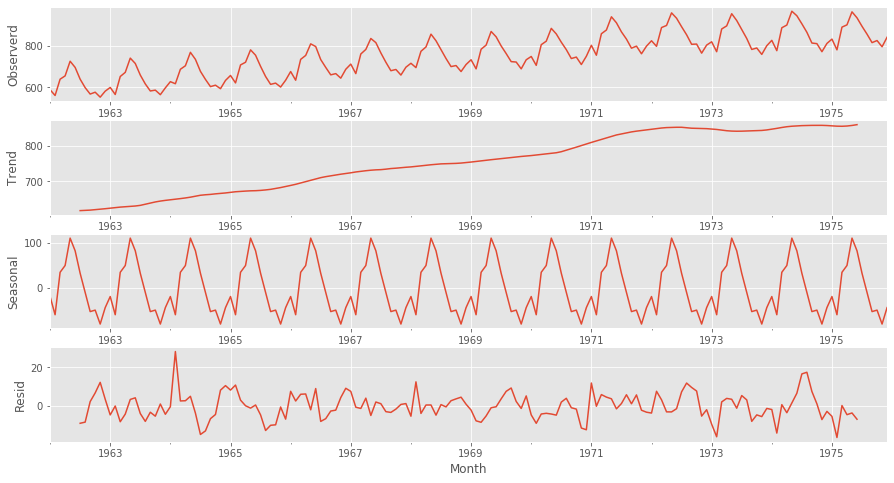

In [17]:
plot_decompose(result)

### 4. Case study2 : airline passengers.csv

In [18]:
url = 'https://raw.githubusercontent.com/sguys99/datasets/master/airline_passengers.csv'
df = pd.read_csv(url, index_col='Month', parse_dates=['Month'])

In [19]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


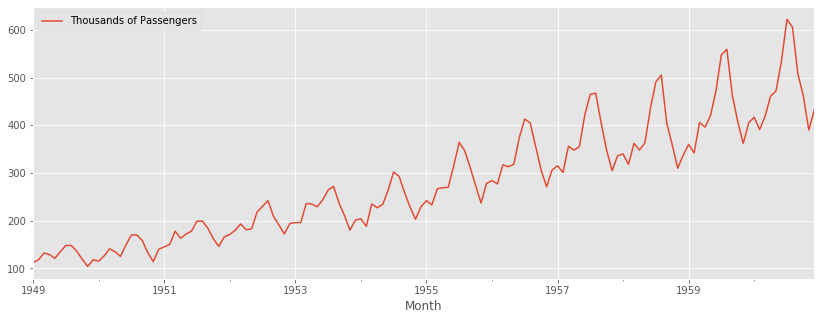

In [20]:
df.plot(figsize = (14, 5))

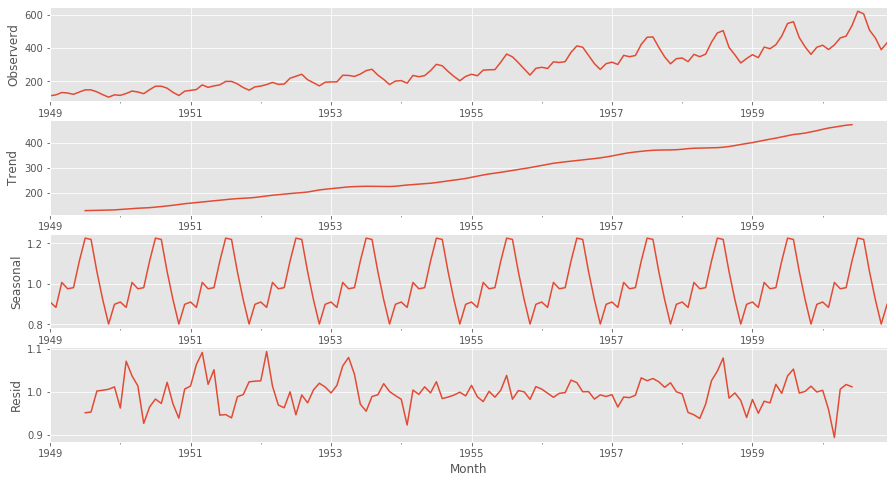

In [21]:
result = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative', freq=12)
plot_decompose(result)